In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("diabetes.xlsx")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
a= df.describe().columns

In [6]:
a

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
for i in a:
    print(df[i].value_counts())
    print("*"*60)

Glucose
100    17
99     17
150    15
106    14
129    14
       ..
44      1
177     1
191     1
61      1
190     1
Name: count, Length: 136, dtype: int64
************************************************************
BloodPressure
70     57
74     52
78     45
68     45
64     43
72     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
58     21
86     21
50     14
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64
************************************************************
SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     

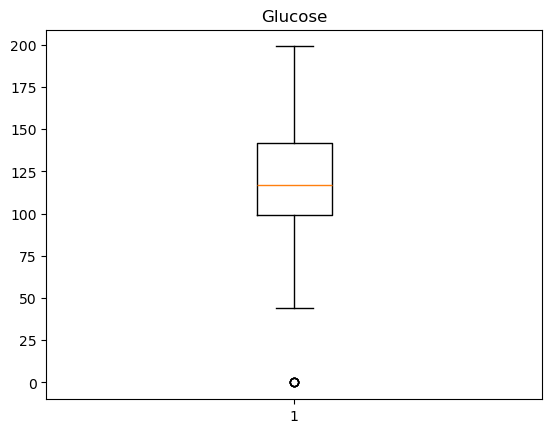

****************************************************************************************************


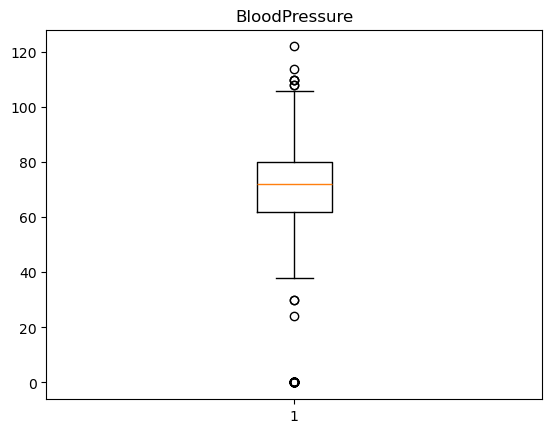

****************************************************************************************************


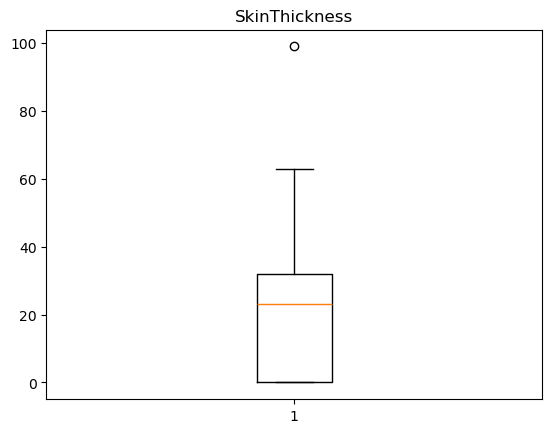

****************************************************************************************************


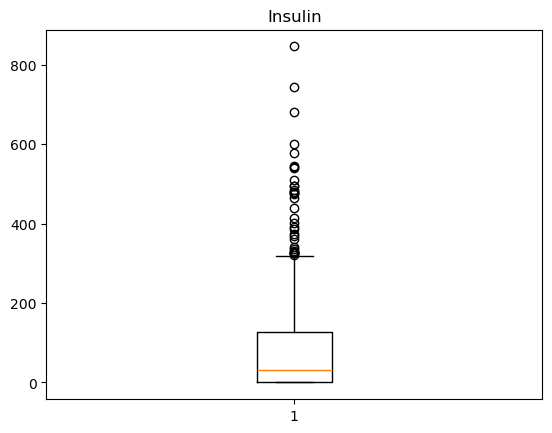

****************************************************************************************************


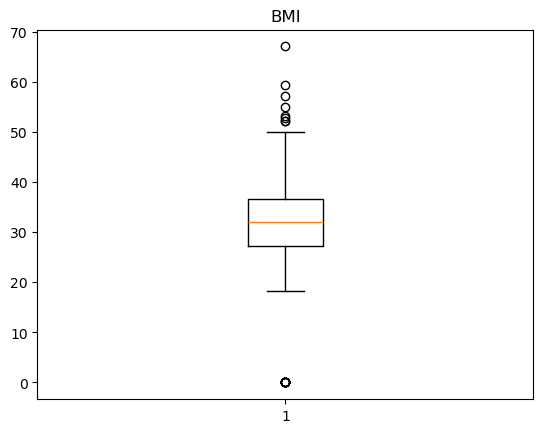

****************************************************************************************************


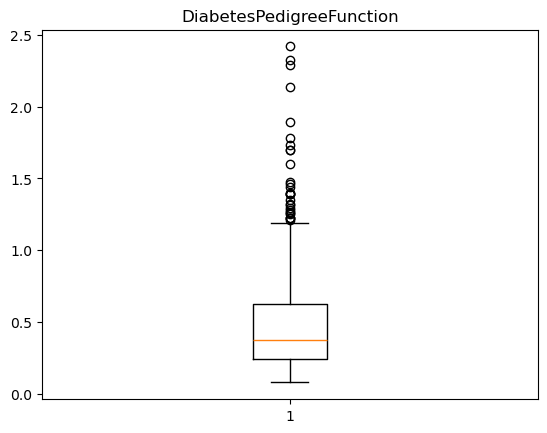

****************************************************************************************************


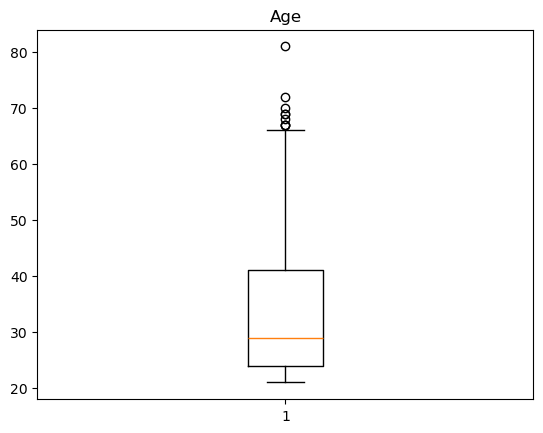

****************************************************************************************************


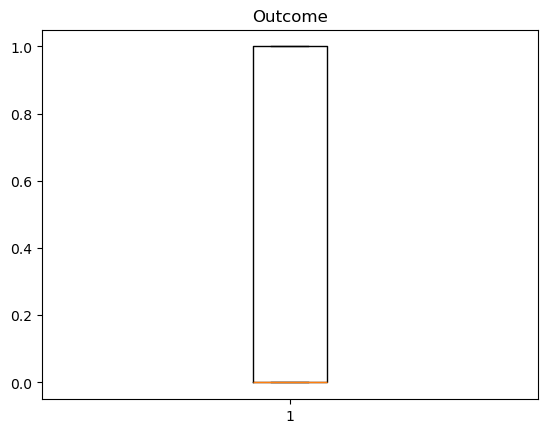

****************************************************************************************************


In [8]:
for i in a:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
    print("*"*100)

In [9]:
l1=(a)

In [10]:
for col in a:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  def outliers(value):
    if value < lower_bound:
      return lower_bound
    elif value > upper_bound:
      return upper_bound
    else:
      return value
    
  df[col]=df[col].apply(outliers)

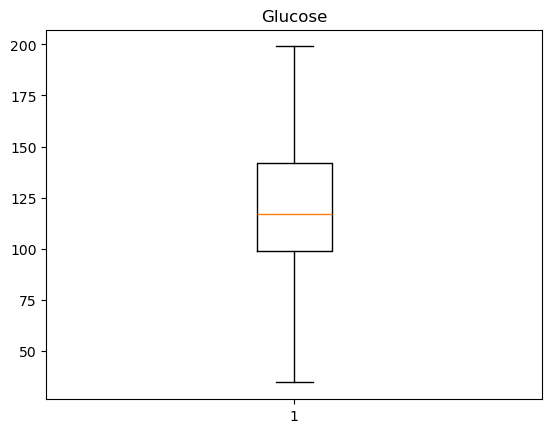

****************************************************************************************************


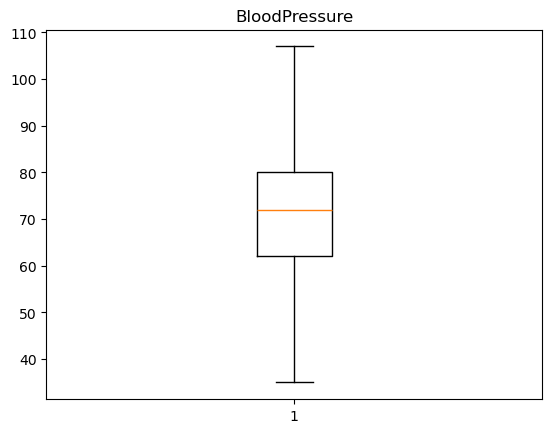

****************************************************************************************************


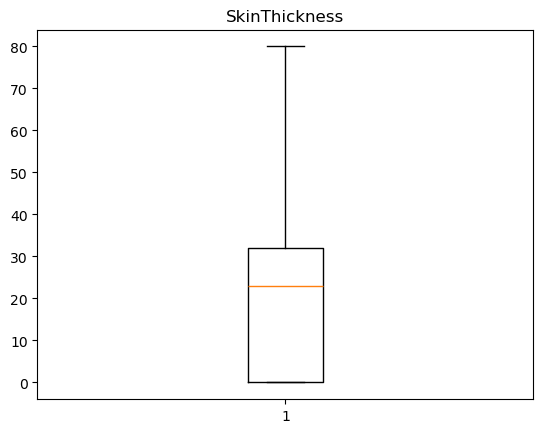

****************************************************************************************************


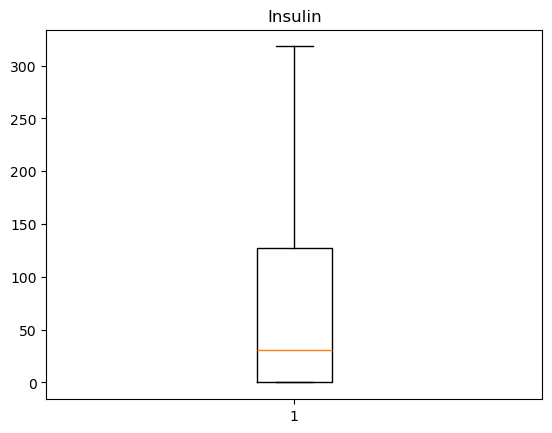

****************************************************************************************************


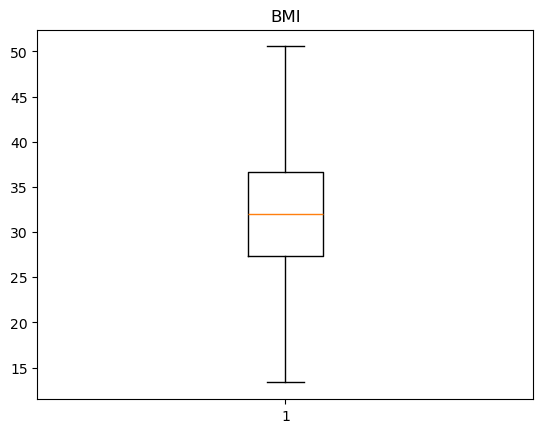

****************************************************************************************************


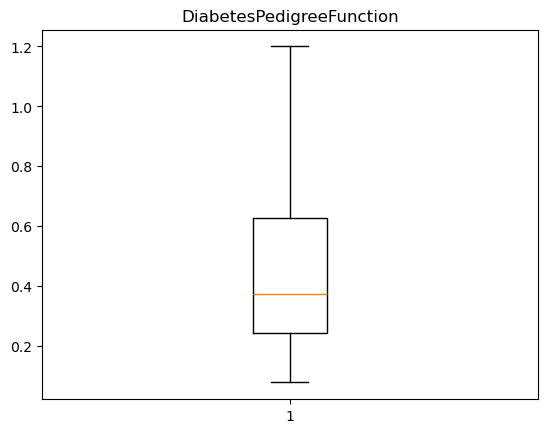

****************************************************************************************************


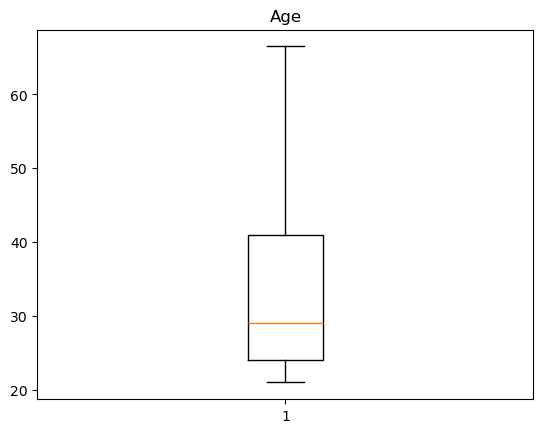

****************************************************************************************************


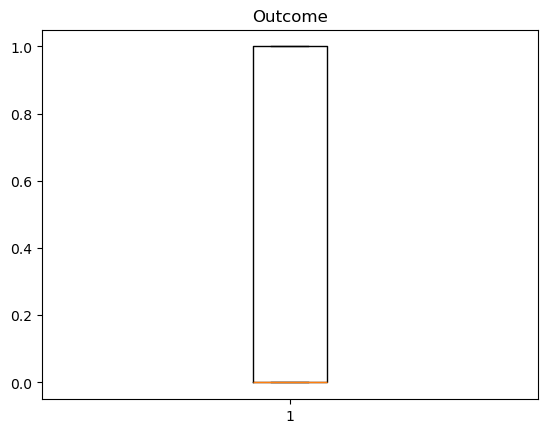

****************************************************************************************************


In [11]:
for i in a:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
    print("*"*100)

In [12]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [13]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
a= MinMaxScaler()

In [17]:
b=x.columns

In [18]:
for i in b:
    x[i]=a.fit_transform(x[[i]])

In [19]:
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.689970,0.208333,0.4375,0.000000,0.544355,0.489305,0.637363
1,0.306991,0.430556,0.3625,0.000000,0.356183,0.243316,0.219780
2,0.902736,0.402778,0.0000,0.000000,0.267473,0.529412,0.681319
3,0.702128,0.430556,0.2875,0.295481,0.396505,0.079323,0.000000
4,0.702128,0.069444,0.4375,0.528094,0.799731,1.000000,0.263736
...,...,...,...,...,...,...,...
763,0.404255,0.569444,0.6000,0.565815,0.525538,0.082888,0.923077
764,0.531915,0.486111,0.3375,0.000000,0.630376,0.233512,0.131868
765,0.525836,0.513889,0.2875,0.352063,0.345430,0.148841,0.197802
766,0.556231,0.347222,0.0000,0.000000,0.450269,0.241533,0.571429


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree=DecisionTreeClassifier()

In [24]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred = tree.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy = accuracy_score(y_pred,y_test)
print("accuracy",accuracy)

accuracy 0.7012987012987013


# Sampling

In [29]:
# 1.Oversampling
# 2.Undersampling

In [30]:
# 1.Random 
# 2.Random
# 3. SMOTE 

# 1 Random Oversampling

In [32]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [33]:
# Random Oversampler
from imblearn.over_sampling import RandomOverSampler

In [34]:
# Random Undersampler
from imblearn.under_sampling import RandomUnderSampler

In [35]:
# instance      # outcome value is inblance data..it will be balcne the dta that its why ues

random_over = RandomOverSampler()

x_sample, y_sample = random_over.fit_resample(x,y)
y_sample.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [36]:
model=DecisionTreeClassifier()

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=10)

In [38]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred=model.predict(x_test)

In [40]:
accuracy = accuracy_score(y_pred,y_test)
print("accuracy",accuracy)

accuracy 0.795


In [41]:
# smt = SMOTE(K_neighbors=5)  # minority/majority =0.6      :- small value nearest to value_counts  sampling_strategy=0.9
# x_sample, y_sample =smt.fit_resample(x,y)
# y_Sample.vlue_counts()

# Model development for classificaton

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rc=RandomForestClassifier(n_estimators=60,criterion= "gini")

In [45]:
x=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)   # base model

In [47]:
rc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60)

In [48]:
y_pred=model.predict(x_test)

In [49]:
accuracy = accuracy_score(y_pred,y_test)
print("accuracy",accuracy)

accuracy 0.6168831168831169


# 1. Random Oversampling

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=10)    # sample mode

In [52]:
rc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60)

In [53]:
y_pred=model.predict(x_test)

In [54]:
accuracy = accuracy_score(y_pred,y_test)
print("accuracy",accuracy)

accuracy 0.795


# 2. Random Undersampling

In [56]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [57]:
random_under = RandomUnderSampler()

x_sample, y_sample = random_under.fit_resample(x,y)
y_sample.value_counts()

Outcome
0    268
1    268
Name: count, dtype: int64

In [58]:
random_under = RandomUnderSampler(sampling_strategy=0.8)

x_sample, y_sample = random_under.fit_resample(x,y)
y_sample.value_counts()

Outcome
0    335
1    268
Name: count, dtype: int64

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=10)

In [60]:
rc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60)

In [61]:
y_pred=model.predict(x_test)

In [62]:
accuracy = accuracy_score(y_pred,y_test)
print("accuracy",accuracy)

accuracy 0.5867768595041323


# 3. SMOTE

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [66]:
smt = SMOTE(k_neighbors=5, sampling_strategy=0.6)  # minority/majority = 0.6
x_sample, y_sample = smt.fit_resample(x,y)
y_sample.value_counts()

Outcome
0    500
1    300
Name: count, dtype: int64

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=10)

In [68]:
rc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60)

In [69]:
y_pred=model.predict(x_test)

In [70]:
accuracy = accuracy_score(y_pred,y_test)
print("accuracy",accuracy)

accuracy 0.6125


# AdbBoostclassifier

In [138]:
from sklearn.ensemble import AdaBoostClassifier

In [227]:
from sklearn.model_selection import RandomizedSearchCV

In [229]:
adb_clf = AdaBoostClassifier(random_state=30)

In [231]:
adb_clf.fit(x_train,y_train)

AdaBoostClassifier(random_state=30)

In [232]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [235]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
print("*"*60)

Accuracy: 0.6125
************************************************************


In [237]:
accuracy = accuracy_score(y_train, y_train)
print("Accuracy:",accuracy)
print("*"*60)

Accuracy: 1.0
************************************************************


# hyperparamter tunning

In [240]:
adb_clf = AdaBoostClassifier(random_state=30)

param_grid ={
               "n_estimators": np.arange(10,200,2),
                "learning_rate":np.arange(0,2,0.001)}

rscv_adb_clf = RandomizedSearchCV(adb_clf,param_grid,cv=7)
rscv_adb_clf.fit(x_train,y_train)
rscv_adb_clf.best_estimator_

AdaBoostClassifier(learning_rate=0.115, n_estimators=120, random_state=30)